Epoch 1/10
840/840 - 21s - loss: 0.0043 - 21s/epoch - 25ms/step
Epoch 2/10
840/840 - 12s - loss: 2.3356e-04 - 12s/epoch - 14ms/step
Epoch 3/10
840/840 - 11s - loss: 1.4111e-04 - 11s/epoch - 14ms/step
Epoch 4/10
840/840 - 11s - loss: 8.0324e-05 - 11s/epoch - 14ms/step
Epoch 5/10
840/840 - 11s - loss: 7.7945e-05 - 11s/epoch - 13ms/step
Epoch 6/10
840/840 - 11s - loss: 7.0547e-05 - 11s/epoch - 13ms/step
Epoch 7/10
840/840 - 11s - loss: 5.6850e-05 - 11s/epoch - 13ms/step
Epoch 8/10
840/840 - 11s - loss: 4.7475e-05 - 11s/epoch - 14ms/step
Epoch 9/10
840/840 - 12s - loss: 2.0922e-05 - 12s/epoch - 14ms/step
Epoch 10/10
840/840 - 12s - loss: 4.0799e-05 - 12s/epoch - 14ms/step
1/1 [==============================] - 0s 51ms/step


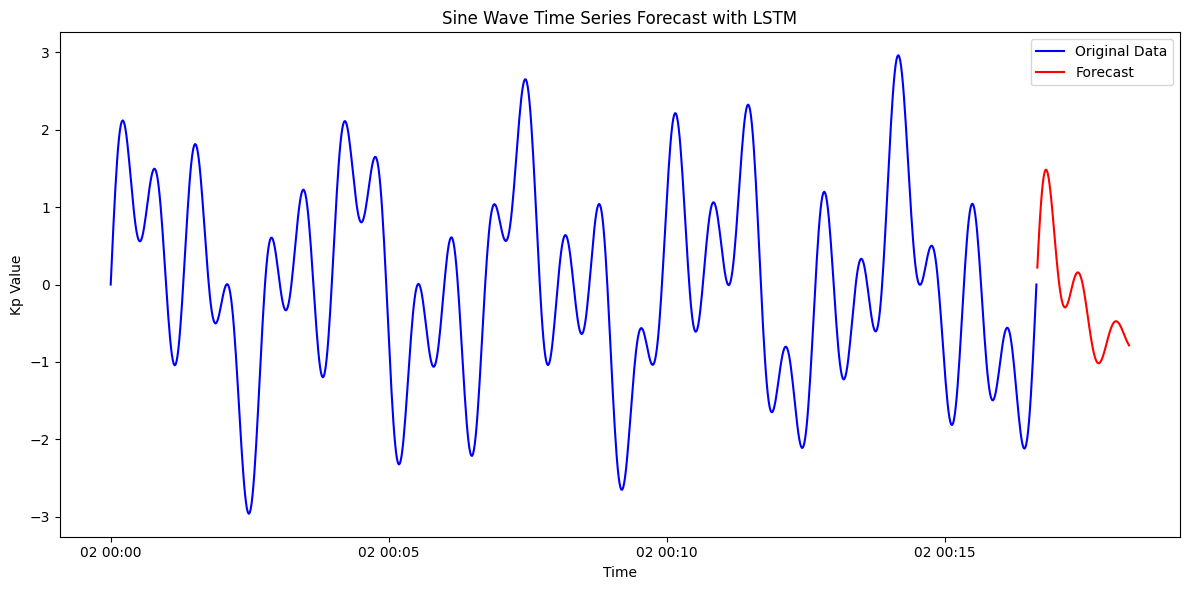

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 60  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(300):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/10
750/750 - 26s - loss: 0.0060 - 26s/epoch - 34ms/step
Epoch 2/10
750/750 - 24s - loss: 2.7809e-04 - 24s/epoch - 32ms/step
Epoch 3/10
750/750 - 24s - loss: 1.7494e-04 - 24s/epoch - 32ms/step
Epoch 4/10
750/750 - 24s - loss: 7.6852e-05 - 24s/epoch - 32ms/step
Epoch 5/10
750/750 - 24s - loss: 4.1025e-05 - 24s/epoch - 32ms/step
Epoch 6/10
750/750 - 23s - loss: 7.8596e-05 - 23s/epoch - 30ms/step
Epoch 7/10
750/750 - 24s - loss: 3.9478e-05 - 24s/epoch - 31ms/step
Epoch 8/10
750/750 - 24s - loss: 6.0064e-05 - 24s/epoch - 32ms/step
Epoch 9/10
750/750 - 24s - loss: 1.5103e-05 - 24s/epoch - 32ms/step
Epoch 10/10
750/750 - 24s - loss: 4.3993e-05 - 24s/epoch - 32ms/step
1/1 [==============================] - 0s 28ms/step


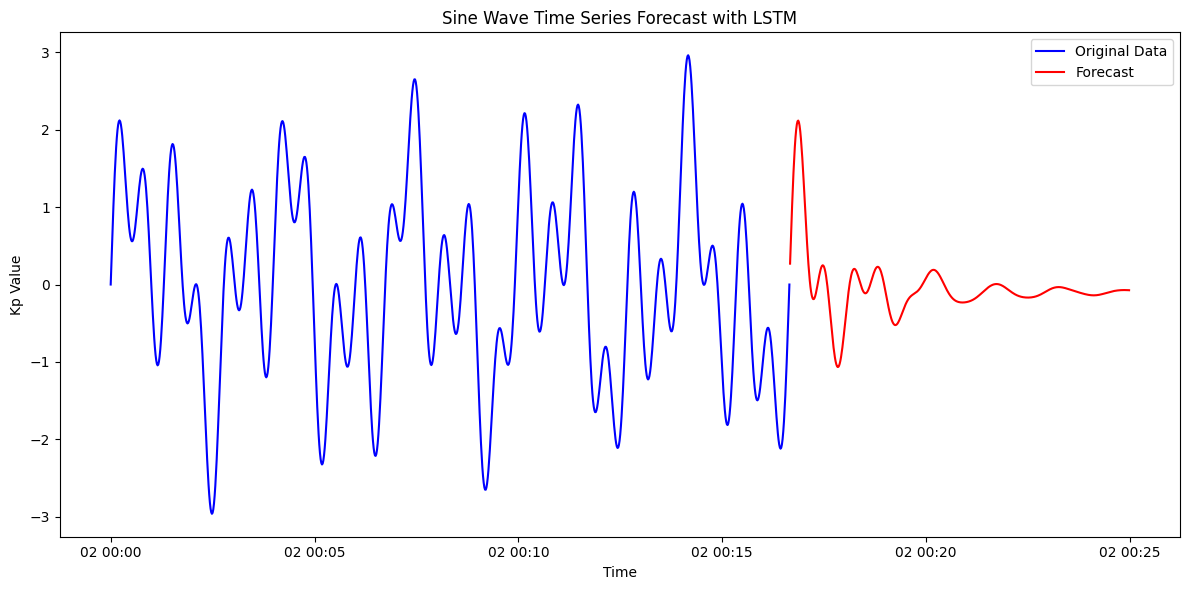

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 150  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 50  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(100):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/10
700/700 - 37s - loss: 0.0072 - 37s/epoch - 53ms/step
Epoch 2/10
700/700 - 29s - loss: 3.8503e-04 - 29s/epoch - 41ms/step
Epoch 3/10
700/700 - 29s - loss: 1.6685e-04 - 29s/epoch - 41ms/step
Epoch 4/10
700/700 - 30s - loss: 6.9755e-05 - 30s/epoch - 42ms/step
Epoch 5/10
700/700 - 29s - loss: 5.7304e-05 - 29s/epoch - 41ms/step
Epoch 6/10
700/700 - 28s - loss: 7.8385e-05 - 28s/epoch - 40ms/step
Epoch 7/10
700/700 - 28s - loss: 4.4257e-05 - 28s/epoch - 40ms/step
Epoch 8/10
700/700 - 30s - loss: 5.9731e-05 - 30s/epoch - 43ms/step
Epoch 9/10
700/700 - 29s - loss: 2.8867e-04 - 29s/epoch - 41ms/step
Epoch 10/10
700/700 - 29s - loss: 7.4967e-05 - 29s/epoch - 41ms/step
1/1 [==============================] - 0s 37ms/step


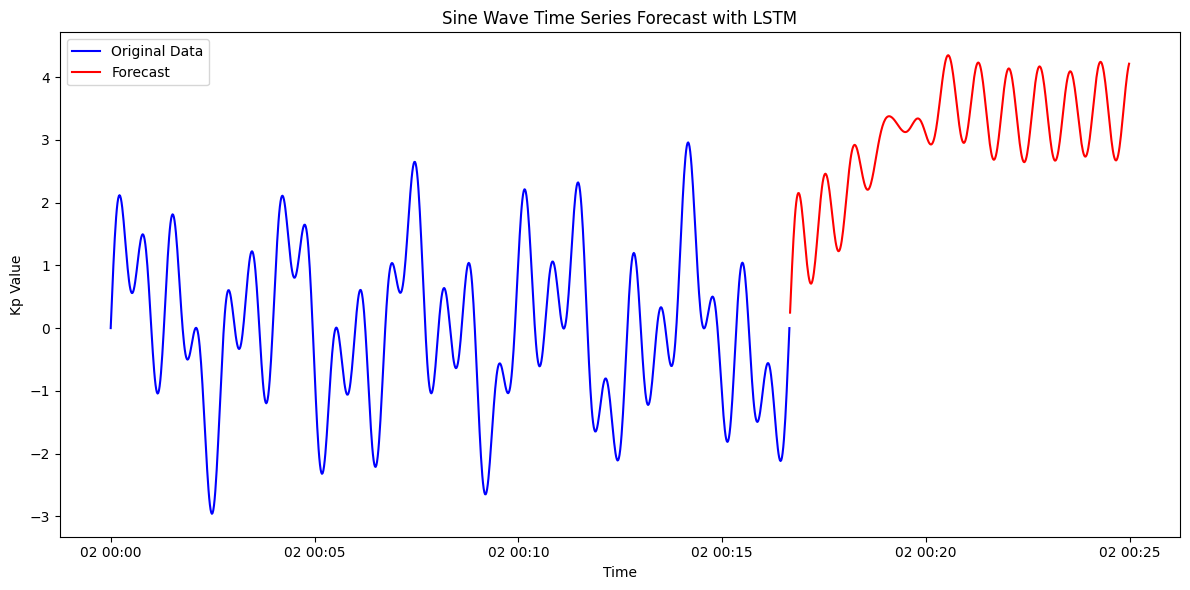

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 200  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/10
650/650 - 38s - loss: 0.0079 - 38s/epoch - 58ms/step
Epoch 2/10
650/650 - 34s - loss: 4.8996e-04 - 34s/epoch - 52ms/step
Epoch 3/10
650/650 - 33s - loss: 2.0987e-04 - 33s/epoch - 50ms/step
Epoch 4/10
650/650 - 35s - loss: 1.3317e-04 - 35s/epoch - 53ms/step
Epoch 5/10
650/650 - 35s - loss: 7.2462e-05 - 35s/epoch - 54ms/step
Epoch 6/10
650/650 - 32s - loss: 5.4337e-05 - 32s/epoch - 50ms/step
Epoch 7/10
650/650 - 34s - loss: 4.1901e-05 - 34s/epoch - 52ms/step
Epoch 8/10
650/650 - 32s - loss: 6.4031e-05 - 32s/epoch - 49ms/step
Epoch 9/10
650/650 - 34s - loss: 3.9157e-05 - 34s/epoch - 52ms/step
Epoch 10/10
650/650 - 32s - loss: 6.9812e-05 - 32s/epoch - 49ms/step
1/1 [==============================] - 0s 33ms/step


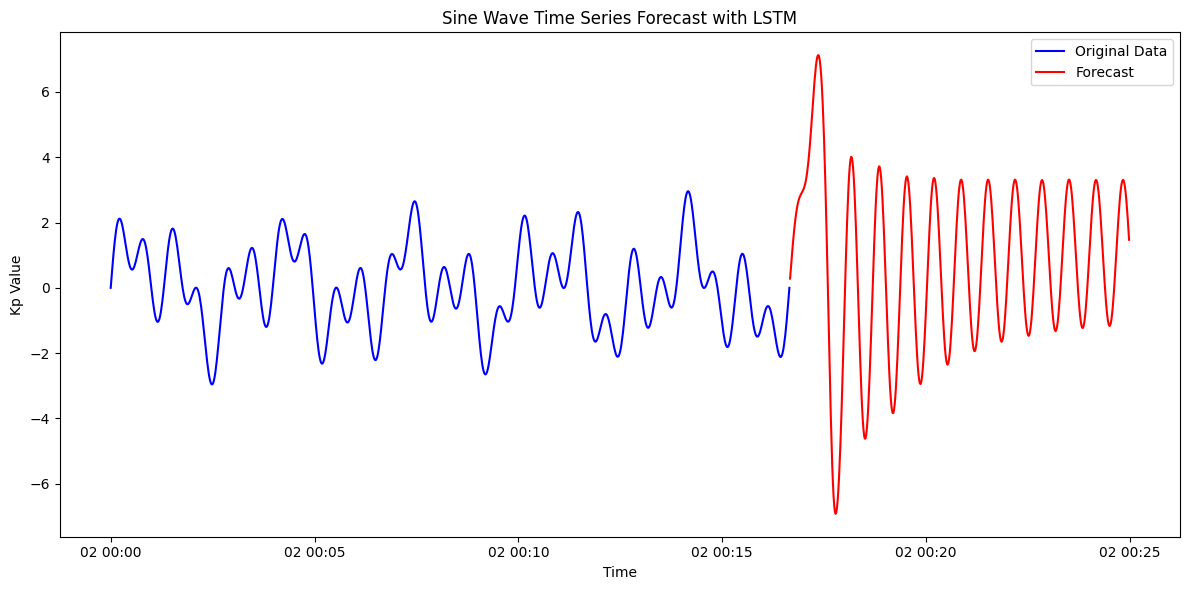

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 250  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/10
650/650 - 86s - loss: 0.0069 - 86s/epoch - 132ms/step
Epoch 2/10
650/650 - 78s - loss: 2.4822e-04 - 78s/epoch - 119ms/step
Epoch 3/10
650/650 - 78s - loss: 2.7886e-04 - 78s/epoch - 120ms/step
Epoch 4/10
650/650 - 77s - loss: 2.0190e-04 - 77s/epoch - 119ms/step
Epoch 5/10
650/650 - 78s - loss: 1.0830e-04 - 78s/epoch - 120ms/step
Epoch 6/10
650/650 - 77s - loss: 8.6383e-05 - 77s/epoch - 119ms/step
Epoch 7/10
650/650 - 78s - loss: 2.0979e-04 - 78s/epoch - 119ms/step
Epoch 8/10
650/650 - 78s - loss: 8.2406e-05 - 78s/epoch - 120ms/step
Epoch 9/10
650/650 - 81s - loss: 8.5868e-05 - 81s/epoch - 125ms/step
Epoch 10/10
650/650 - 78s - loss: 1.3337e-04 - 78s/epoch - 120ms/step
1/1 [==============================] - 0s 59ms/step


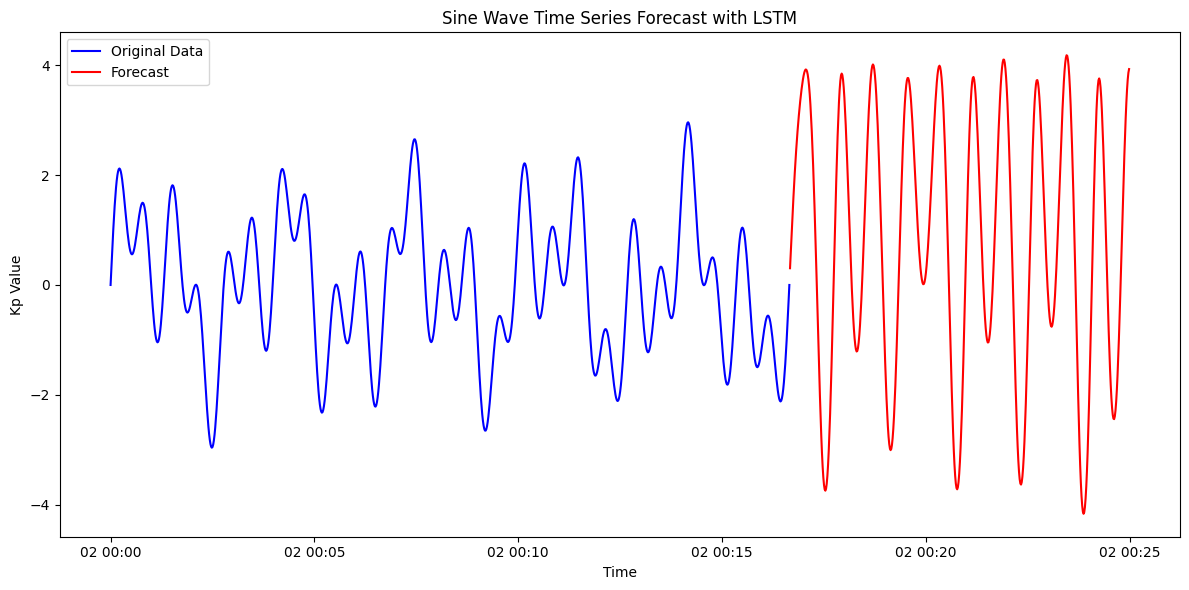

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 250  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/100
700/700 - 32s - loss: 0.0086 - 32s/epoch - 46ms/step
Epoch 2/100
700/700 - 31s - loss: 3.4039e-04 - 31s/epoch - 44ms/step
Epoch 3/100
700/700 - 29s - loss: 1.4956e-04 - 29s/epoch - 41ms/step
Epoch 4/100
700/700 - 30s - loss: 6.0221e-05 - 30s/epoch - 42ms/step
Epoch 5/100
700/700 - 32s - loss: 5.9140e-05 - 32s/epoch - 46ms/step
Epoch 6/100
700/700 - 30s - loss: 4.3556e-05 - 30s/epoch - 43ms/step
Epoch 7/100
700/700 - 29s - loss: 3.6565e-05 - 29s/epoch - 41ms/step
Epoch 8/100
700/700 - 29s - loss: 8.1274e-05 - 29s/epoch - 42ms/step
Epoch 9/100
700/700 - 30s - loss: 2.5401e-05 - 30s/epoch - 42ms/step
Epoch 10/100
700/700 - 29s - loss: 4.5125e-05 - 29s/epoch - 41ms/step
Epoch 11/100
700/700 - 29s - loss: 2.2982e-05 - 29s/epoch - 41ms/step
Epoch 12/100
700/700 - 29s - loss: 3.8226e-05 - 29s/epoch - 41ms/step
Epoch 13/100
700/700 - 30s - loss: 3.5670e-05 - 30s/epoch - 43ms/step
Epoch 14/100
700/700 - 29s - loss: 1.5782e-05 - 29s/epoch - 42ms/step
Epoch 15/100
700/700 - 30s - loss

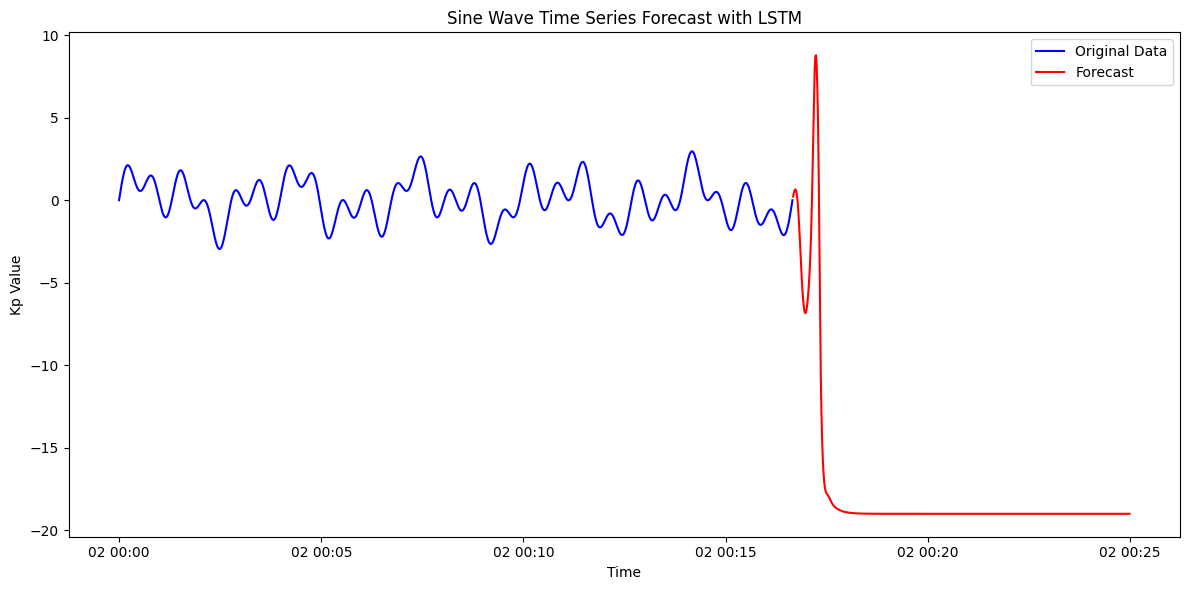

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 200  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/10
11/11 - 11s - loss: 0.1169 - 11s/epoch - 963ms/step
Epoch 2/10
11/11 - 3s - loss: 0.0281 - 3s/epoch - 302ms/step
Epoch 3/10
11/11 - 5s - loss: 0.0196 - 5s/epoch - 425ms/step
Epoch 4/10
11/11 - 3s - loss: 0.0172 - 3s/epoch - 298ms/step
Epoch 5/10
11/11 - 3s - loss: 0.0133 - 3s/epoch - 296ms/step
Epoch 6/10
11/11 - 4s - loss: 0.0105 - 4s/epoch - 334ms/step
Epoch 7/10
11/11 - 4s - loss: 0.0077 - 4s/epoch - 398ms/step
Epoch 8/10
11/11 - 3s - loss: 0.0052 - 3s/epoch - 299ms/step
Epoch 9/10
11/11 - 3s - loss: 0.0038 - 3s/epoch - 302ms/step
Epoch 10/10
11/11 - 5s - loss: 0.0029 - 5s/epoch - 411ms/step
1/1 [==============================] - 0s 71ms/step


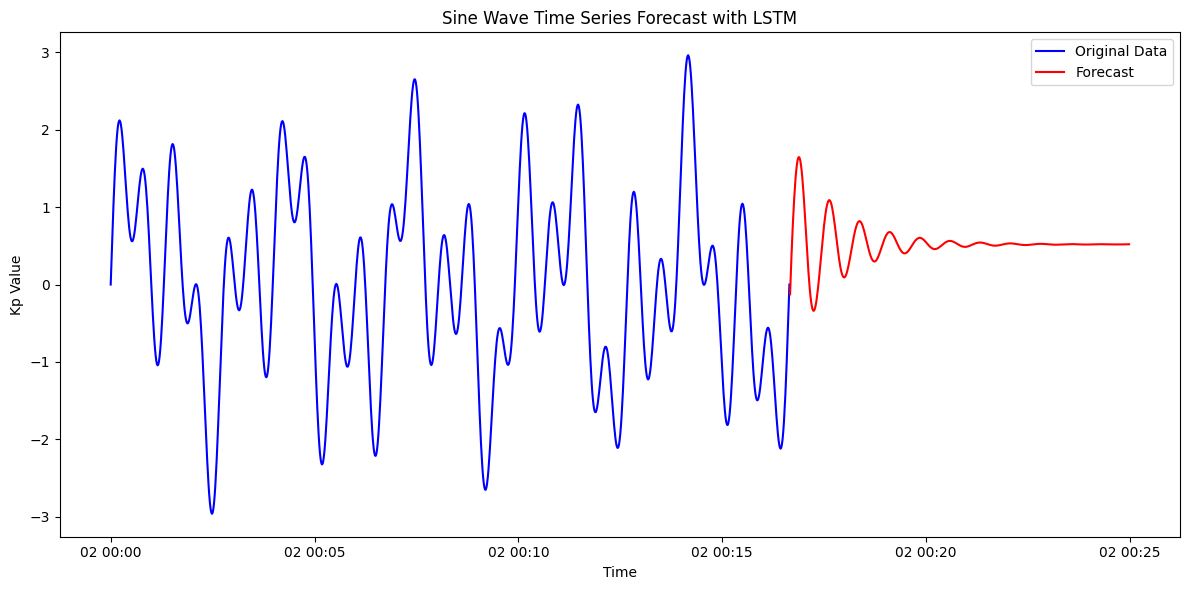

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 250  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/50
11/11 - 11s - loss: 0.0889 - 11s/epoch - 973ms/step
Epoch 2/50
11/11 - 3s - loss: 0.0246 - 3s/epoch - 306ms/step
Epoch 3/50
11/11 - 4s - loss: 0.0195 - 4s/epoch - 388ms/step
Epoch 4/50
11/11 - 4s - loss: 0.0163 - 4s/epoch - 330ms/step
Epoch 5/50
11/11 - 3s - loss: 0.0134 - 3s/epoch - 298ms/step
Epoch 6/50
11/11 - 3s - loss: 0.0111 - 3s/epoch - 318ms/step
Epoch 7/50
11/11 - 5s - loss: 0.0086 - 5s/epoch - 412ms/step
Epoch 8/50
11/11 - 3s - loss: 0.0060 - 3s/epoch - 298ms/step
Epoch 9/50
11/11 - 3s - loss: 0.0039 - 3s/epoch - 309ms/step
Epoch 10/50
11/11 - 4s - loss: 0.0030 - 4s/epoch - 396ms/step
Epoch 11/50
11/11 - 4s - loss: 0.0020 - 4s/epoch - 323ms/step
Epoch 12/50
11/11 - 3s - loss: 0.0014 - 3s/epoch - 314ms/step
Epoch 13/50
11/11 - 4s - loss: 9.2737e-04 - 4s/epoch - 332ms/step
Epoch 14/50
11/11 - 5s - loss: 6.7537e-04 - 5s/epoch - 424ms/step
Epoch 15/50
11/11 - 4s - loss: 4.4606e-04 - 4s/epoch - 336ms/step
Epoch 16/50
11/11 - 3s - loss: 2.8099e-04 - 3s/epoch - 298ms/step

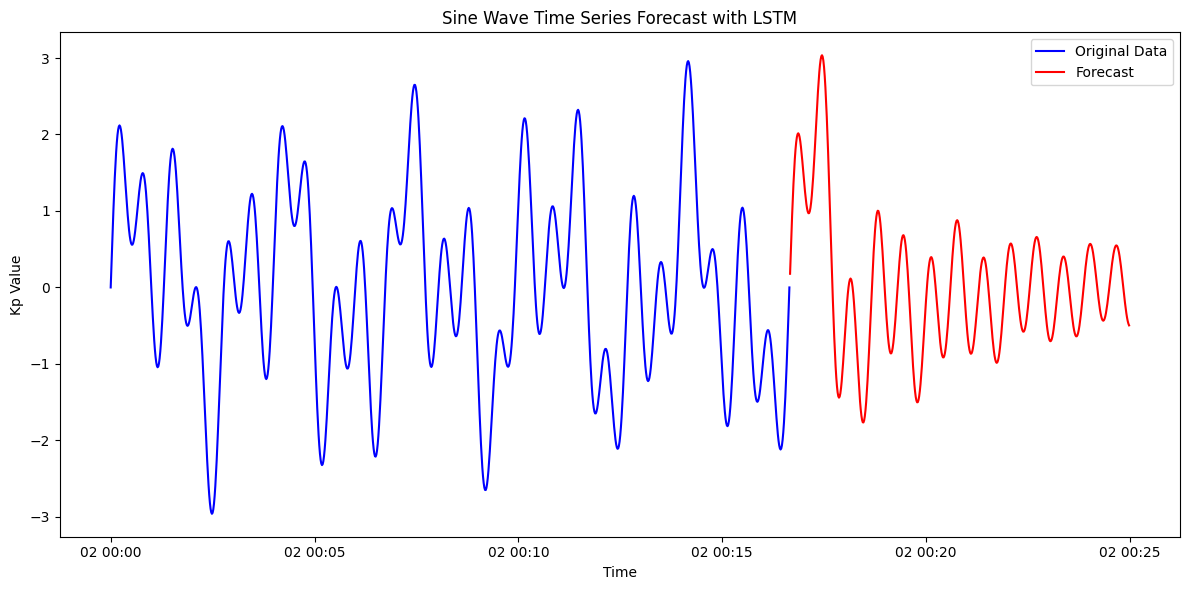

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 250  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/100
11/11 - 10s - loss: 0.0952 - 10s/epoch - 911ms/step
Epoch 2/100
11/11 - 4s - loss: 0.0245 - 4s/epoch - 348ms/step
Epoch 3/100
11/11 - 4s - loss: 0.0188 - 4s/epoch - 358ms/step
Epoch 4/100
11/11 - 3s - loss: 0.0157 - 3s/epoch - 299ms/step
Epoch 5/100
11/11 - 3s - loss: 0.0133 - 3s/epoch - 312ms/step
Epoch 6/100
11/11 - 5s - loss: 0.0109 - 5s/epoch - 418ms/step
Epoch 7/100
11/11 - 3s - loss: 0.0084 - 3s/epoch - 313ms/step
Epoch 8/100
11/11 - 3s - loss: 0.0060 - 3s/epoch - 299ms/step
Epoch 9/100
11/11 - 4s - loss: 0.0044 - 4s/epoch - 346ms/step
Epoch 10/100
11/11 - 4s - loss: 0.0033 - 4s/epoch - 365ms/step
Epoch 11/100
11/11 - 3s - loss: 0.0028 - 3s/epoch - 307ms/step
Epoch 12/100
11/11 - 3s - loss: 0.0018 - 3s/epoch - 303ms/step
Epoch 13/100
11/11 - 5s - loss: 0.0013 - 5s/epoch - 424ms/step
Epoch 14/100
11/11 - 3s - loss: 0.0010 - 3s/epoch - 298ms/step
Epoch 15/100
11/11 - 3s - loss: 7.9003e-04 - 3s/epoch - 306ms/step
Epoch 16/100
11/11 - 4s - loss: 5.9547e-04 - 4s/epoch - 35

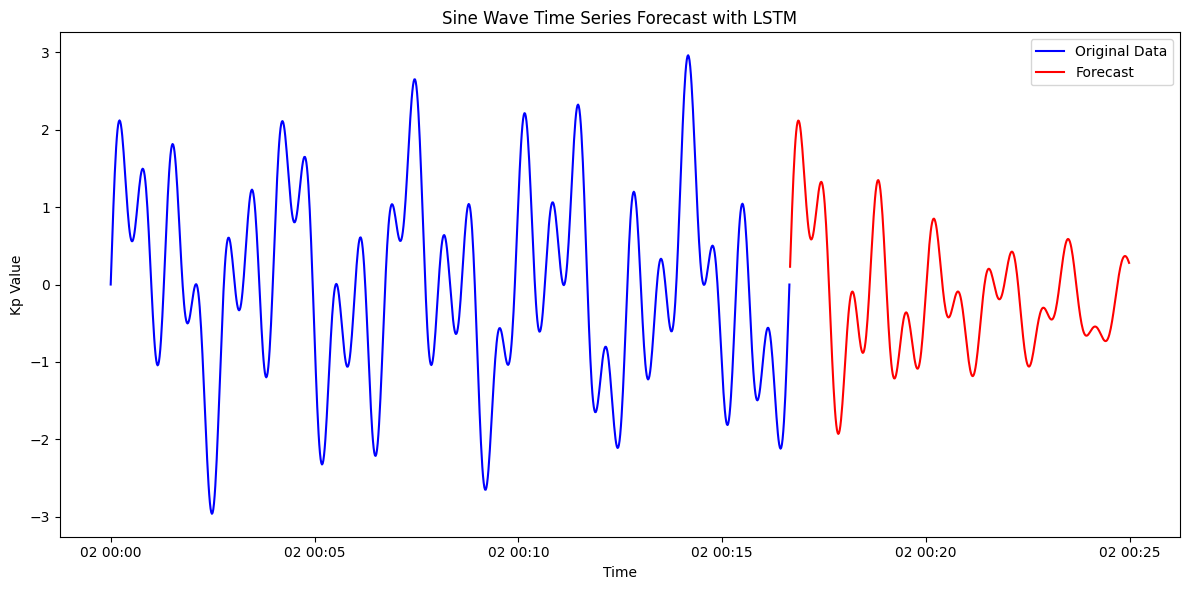

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 250  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()



# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()

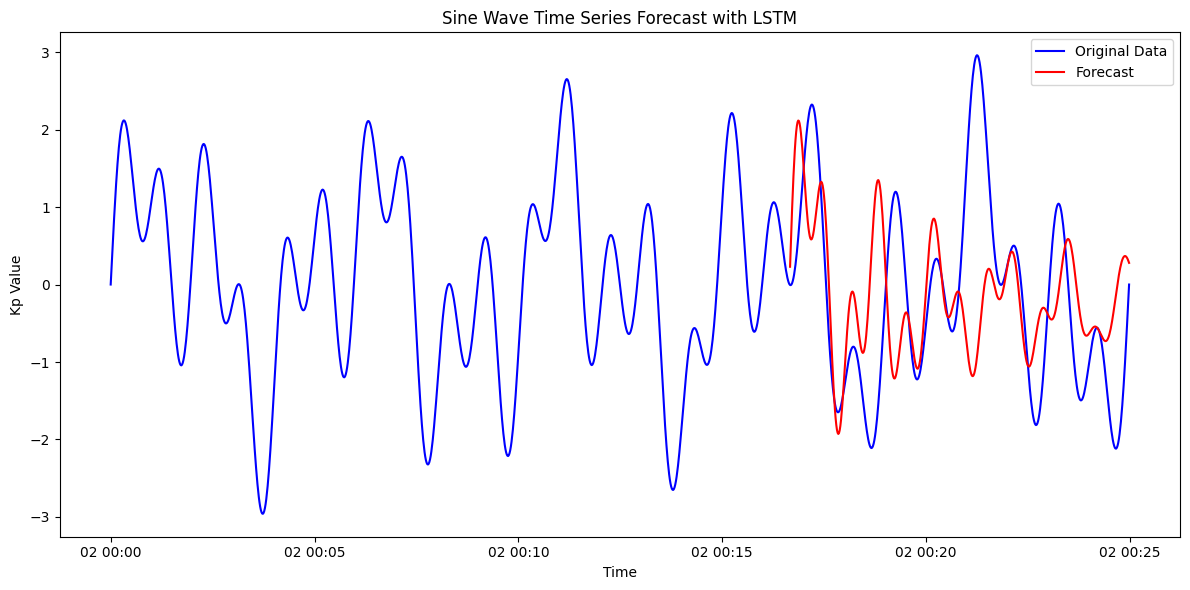

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1500  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
# sequence_length = 250  # Number of previous time steps to use for prediction
# X_train, y_train = create_sequences(scaled_data, sequence_length)

# # Reshape the input data for LSTM (samples, time steps, features)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences = True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the LSTM model
# model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2)

# # Forecast the next 100 timesteps beyond the test data using a closed loop
# test_data = scaled_data[-sequence_length:]
# forecast = []
# for _ in range(500):
#     test_input = test_data[-sequence_length:]
#     test_input = test_input.reshape(1, sequence_length, 1)
#     predicted_value = model.predict(test_input)[0, 0]
#     forecast.append(predicted_value)
#     test_data = np.append(test_data, predicted_value)

# # Inverse transform the scaled data to get the actual values
# forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# actual_forecast_values =

# # Extend the original time index to include the forecasted dates
# forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/100
6/6 - 13s - loss: 0.1658 - 13s/epoch - 2s/step
Epoch 2/100
6/6 - 4s - loss: 0.0585 - 4s/epoch - 642ms/step
Epoch 3/100
6/6 - 4s - loss: 0.0453 - 4s/epoch - 635ms/step
Epoch 4/100
6/6 - 5s - loss: 0.0313 - 5s/epoch - 854ms/step
Epoch 5/100
6/6 - 4s - loss: 0.0319 - 4s/epoch - 649ms/step
Epoch 6/100
6/6 - 4s - loss: 0.0280 - 4s/epoch - 657ms/step
Epoch 7/100
6/6 - 5s - loss: 0.0266 - 5s/epoch - 843ms/step
Epoch 8/100
6/6 - 4s - loss: 0.0248 - 4s/epoch - 638ms/step
Epoch 9/100
6/6 - 4s - loss: 0.0256 - 4s/epoch - 665ms/step
Epoch 10/100
6/6 - 5s - loss: 0.0220 - 5s/epoch - 843ms/step
Epoch 11/100
6/6 - 4s - loss: 0.0207 - 4s/epoch - 685ms/step
Epoch 12/100
6/6 - 4s - loss: 0.0182 - 4s/epoch - 643ms/step
Epoch 13/100
6/6 - 5s - loss: 0.0155 - 5s/epoch - 853ms/step
Epoch 14/100
6/6 - 4s - loss: 0.0120 - 4s/epoch - 649ms/step
Epoch 15/100
6/6 - 4s - loss: 0.0115 - 4s/epoch - 638ms/step
Epoch 16/100
6/6 - 5s - loss: 0.0083 - 5s/epoch - 847ms/step
Epoch 17/100
6/6 - 4s - loss: 0.00

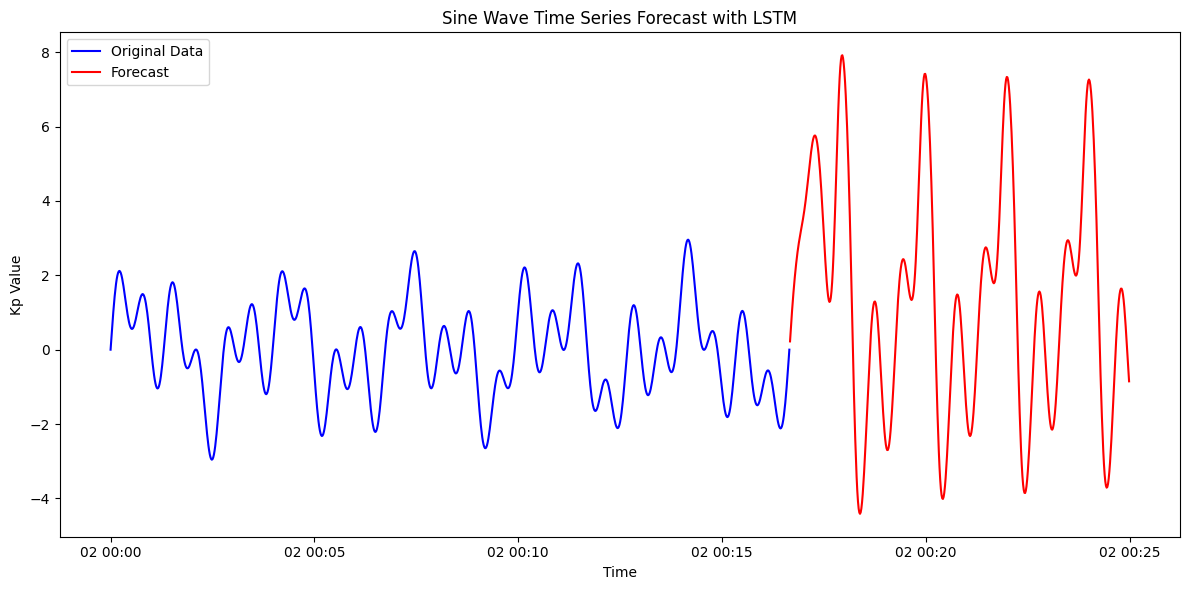

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Example: Create a sum of three sine waves with different frequencies
n_samples = 1000  # Number of data points
time = np.linspace(0, 10, n_samples)  # Time values from 0 to 10 seconds

# Define the frequencies of the sine waves
freq1 = 0.5  # Frequency of the first sine wave (0.5 Hz)
freq2 = 1.2  # Frequency of the second sine wave (1.2 Hz)
freq3 = 2.5  # Frequency of the third sine wave (2.5 Hz)

# Generate the sine waves
sine_wave1 = np.sin(2 * np.pi * freq1 * time)
sine_wave2 = np.sin(2 * np.pi * freq2 * time)
sine_wave3 = np.sin(2 * np.pi * freq3 * time)

# Combine the sine waves to create the dummy data
dummy_data = sine_wave1 + sine_wave2 + sine_wave3

# Convert the dummy data to a DataFrame with datetime index
index = pd.date_range(start='2023-08-02', periods=n_samples, freq='s')
df = pd.DataFrame({'Kp': dummy_data}, index=index)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Kp'].values.reshape(-1, 1))

# Function to create sequences of data for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 100):  # Leave 100 points for forecasting
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training
sequence_length = 250  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(scaled_data, sequence_length)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences = True))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2)

# Forecast the next 100 timesteps beyond the test data using a closed loop
test_data = scaled_data[-sequence_length:]
forecast = []
for _ in range(500):
    test_input = test_data[-sequence_length:]
    test_input = test_input.reshape(1, sequence_length, 1)
    predicted_value = model.predict(test_input)[0, 0]
    forecast.append(predicted_value)
    test_data = np.append(test_data, predicted_value)

# Inverse transform the scaled data to get the actual values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()



# Extend the original time index to include the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(seconds=1), periods=len(forecast), freq='s')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Kp'], label='Original Data', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Kp Value')
plt.title('Sine Wave Time Series Forecast with LSTM')
plt.legend()
plt.tight_layout()
plt.show()